In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import os

# Define and set the nltk data path explicitly
nltk_data_path = r'C:\Users\FATEMEH\AppData\Roaming\nltk_data'
os.environ['NLTK_DATA'] = nltk_data_path
nltk.data.path.append(nltk_data_path)

# Ensure the punkt tokenizer and related files are downloaded and available
nltk.download('punkt', download_dir=nltk_data_path)

# Verify if punkt is available
try:
    print(nltk.data.find('tokenizers/punkt'))
except LookupError:
    print("Punkt tokenizer not found. Please check your nltk configuration.")

# Path to the CSV file
csv_file_path = r'C:\Users\FATEMEH\Desktop\DA\Final Project\McDonald_s_Reviews.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file_path)

# Assuming the reviews are in a column named 'Review'
if 'review' in data.columns:
    data['Sentiment'] = data['review'].apply(lambda review: TextBlob(review).sentiment.polarity)
    
    # Calculate the mean sentiment
    mean_sentiment = data['Sentiment'].mean()
    print(f"Mean Sentiment Score: {mean_sentiment}")
    
    # Save the DataFrame with sentiments to a new CSV file
    output_file_path = r'C:\Users\FATEMEH\Desktop\DA\Final Project\McDonald_s_Reviews_with_Sentiments.csv'
    data.to_csv(output_file_path, index=False)
    print(f"Sentiment analysis completed. Results saved to {output_file_path}")
else:
    print("The column 'Review' was not found in the CSV file.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FATEMEH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\FATEMEH\AppData\Roaming\nltk_data\tokenizers\punkt
Mean Sentiment Score: 0.38518128175224575
Sentiment analysis completed. Results saved to C:\Users\FATEMEH\Desktop\DA\Final Project\McDonald_s_Reviews_with_Sentiments.csv


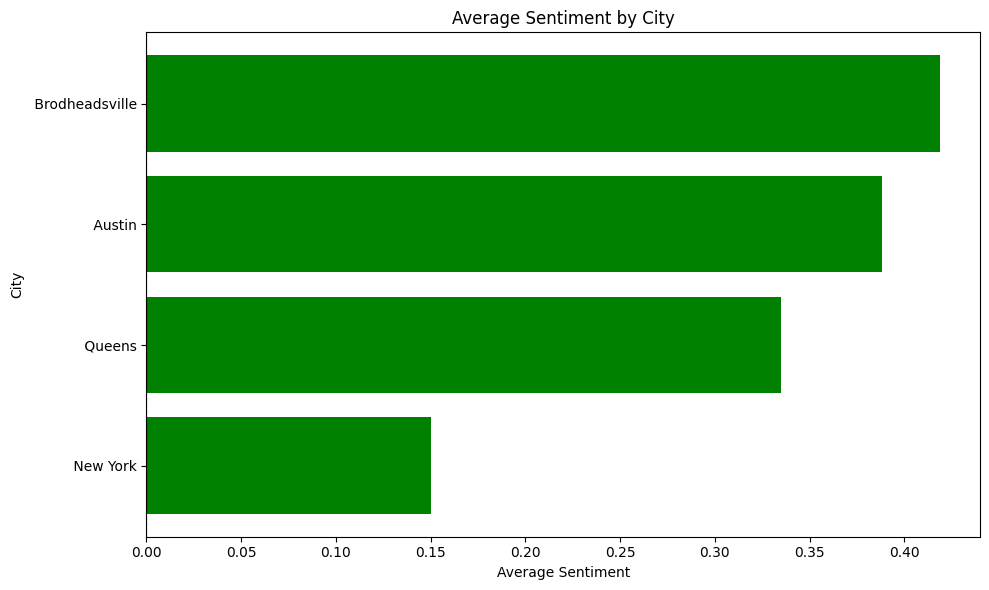

Sentiment analysis completed. Results saved to C:\Users\FATEMEH\Desktop\DA\Final Project\McDonald_s_Reviews_with_Sentiments_Updated.csv


In [18]:

if 'review' in data.columns and 'City' in data.columns:
    # Calculate the mean sentiment for each city
    city_sentiments = data.groupby('City')['Sentiment'].mean().reset_index()

    # Sort by average sentiment
    city_sentiments = city_sentiments.sort_values(by='Sentiment', ascending=True)


# Visualization: Horizontal bar chart of average sentiment by city
    plt.figure(figsize=(10, 6))
    plt.barh(city_sentiments['City'], city_sentiments['Sentiment'], color=['red' if x < 0 else 'green' for x in city_sentiments['Sentiment']])
    plt.title('Average Sentiment by City')
    plt.xlabel('Average Sentiment')
    plt.ylabel('City')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Line at zero for reference
    plt.tight_layout()
    plt.show()
    
    # Save the DataFrame with sentiments to a new CSV file
    output_file_path = r'C:\Users\FATEMEH\Desktop\DA\Final Project\McDonald_s_Reviews_with_Sentiments_Updated.csv'
    data.to_csv(output_file_path, index=False)
    print(f"Sentiment analysis completed. Results saved to {output_file_path}")
else:
    print("The required columns 'review' and/or 'City' were not found in the CSV file.")


